# Hands-on Exercise 0: Introduction to Python & Astropy
![Astropy: A Community Python Library for Astronomy](http://www.astropy.org/images/astropy_banner_96.png)
========

***
by Leo Singer (2014) and Eric Bellm (2015)


# I. Introduction

This workshop is about doing astronomical data analysis with the [Python programming language](http://python.org/). **No previous experience with Python is necessary!**

Python is a powerful tool, but it comes into its own as a numerical and data analysis environment with the following packages, which you will definitely want to have:

* **[Matplotlib](http://matplotlib.org)**: plotting interactive or publication-quality figures
* **[Numpy](http://numpy.org)**: vectorized arithmetic and linear algebra
* **[Scipy](http://scipy.org)**: curated collection of algorithms for root finding, interpolation, integration, signal processing, statistics, linear algebra, and much more
* **[IPython Notebook](http://ipython.org/notebook.html)**, the Mathematica-like interface that you are using now, and last but not least
* **[Astropy](http://astropy.org/)**, a community library for astronomy. See also [Robitaille et al. (2013)](http://dx.doi.org/10.1051/0004-6361/201322068).

We'll cover the basics of Python itself and then dive in to some applications to explore each of these packages.

**NOTE:** The purest way of interacting with Python is via its command line interpreter, which looks like this:

![A session in the Python command line interpreter](https://raw.github.com/lpsinger/astropy-tutorial/master/terminal.png)

However, a relatively new but very powerful way of using Python is through the IPython Notebook interface, which like Mathematica allows you to intermingle computer code with generated plots...

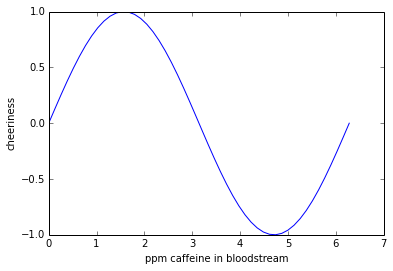

In [1]:
x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.xlabel('ppm caffeine in bloodstream')
plt.ylabel('cheeriness')

and tables...

In [2]:
import astropy.table
tbl = astropy.table.Table()
tbl.add_column(astropy.table.Column(data=np.arange(5),
    name='integers'))
tbl.add_column(astropy.table.Column(data=np.arange(5)**2,
    name='their squares'))
tbl

integers,their squares
0,0
1,1
2,4
3,9
4,16


and even notes and typeset mathematics...

> *And God said:*
>
> > $$\nabla \cdot \mathbf{D} = \rho$$
> > $$\nabla \cdot \mathbf{B} = 0$$
> > $$\nabla \times \mathbf{E} = -\frac{\partial\mathbf{B}}{\partial t}$$
> > $$\nabla \times \mathbf{H} = J + \frac{\partial\mathbf{D}}{\partial t}$$
>
> *and there was light.*

This is all very useful for doing interactive data analysis, so we will use the IPython Notebook interface for this tutorial. **WARNING:** I'm spoiling you rotten by doing this.

---

# II. How to get Python/Matplotlib/Numpy/Scipy

Python and all of the packages that we discuss in this tutorial are open source software, so there multiple options for installing them.

## Recommended on all platforms: Anaconda, Canopy

[Anaconda](https://store.continuum.io/cshop/anaconda/) and [Canopy](https://www.enthought.com/products/canopy/) are free, self-contained Python distributions for Linux, Mac, Windows. Both come with an excellent selection of up-to-date scientific Python libraries, including Astropy.

**TIP** These are both great Python environments for everyday use. If you need the latest version of Python in a headless environment like a cluster or web server, consider the lightweight [Miniconda](http://conda.pydata.org/miniconda.html) distribution.

## Advanced: Debian/Ubuntu

Most operating systems already come with Python. Release schedules vary, but generally the 'testing' versions of [Debian](https://www.debian.org/) and [Ubuntu](http://www.ubuntu.com) come with very up-to-date versions of Python. [Debian Jessie](https://packages.debian.org/search?suite=jessie&searchon=names&keywords=astropy) and [Ubuntu 13.10 (Saucy Salamander)](http://packages.ubuntu.com/utopic/python-astropy) both come with the latest version of Astropy. On these systems, you can set up a pretty complete Python environment with:

    $ sudo apt-get install ipython-notebook python-matplotlib python-scipy python-pip python-astropy

## Advanced: MacPorts

Every version of Mac OS comes with a Python interpreter, but it's slightly easier to obtain Matplotlib and Numpy if you use a package manager such as [MacPorts](http://macports.org), [HomeBrew](http://brew.sh), or [Fink](http://fink.sf.net). I use MacPorts (and contribute to it, too), so that's what I suggest. Install MacPorts and then do:

    $ sudo port install py27-pip py27-matplotlib py27-scipy py27-astropy py27-ipython +notebook

## How to install Python packages

The Python community has developed a huge collection of packages for various tasks. The best place to find Python libraries is the [Python Package Index (PyPI, https://pypi.python.org/)](https://pypi.python.org/).

No matter how you installed Python, you can install any Python package from PyPI using [pip](https://pypi.python.org/pypi/pip). For example:

    $ pip install astroquery

or

    $ pip install --user astroquery

In Anaconda, you can also install some popular packages using [`conda`](http://conda.pydata.org). On Debian or Ubuntu, you can get many Python packages with `apt-get` and on MacPorts with `port`.

---

# IV. Python basics

## The `print` statement and string literals

If this is your first time looking at Python code, the first thing that you might notice is that it is very easy to understand. For example, to print something to the screen, it's just:

In [3]:
print 'Hello world!'

Hello world!


**Note**: `print` changed from a built-in ***statement*** to a ***function*** in Python 3. If you are using Python 3, just put the arguments in parentheses. To get this behavior in previous versions of Python, put this at the top of your script:

    from __future__ import print_function

This is a Python statement, consisting of the built-in command `print` and a string surrounded by single quotes. Double quotes are fine inside a string:

In [4]:
print 'She said, "Hello, world!"'

She said, "Hello, world!"


But if you want single quotes inside your string, you had better delimit it with double quotes:

In [5]:
print "She said, 'Hello, world!'"

She said, 'Hello, world!'


If you need both single quotes and double quotes, you can use backslashes to escape characters.

In [6]:
print 'She said, "O brave new world, that has such people in\'t!"'

She said, "O brave new world, that has such people in't!"


If you need a string that contains newlines, use triple quotes (`'''`) or triple double quotes (`"""`):

In [7]:
print """MIRANDA
  O, wonder!
  How many goodly creatures are there here!
  How beauteous mankind is! O brave new world
  That has such people in't!"""

MIRANDA
  O, wonder!
  How many goodly creatures are there here!
  How beauteous mankind is! O brave new world
  That has such people in't!


Let's say that you need to print a few different things on the same line. Just separate them with commas, as in:

In [8]:
person = 'Miranda'
print "'Tis new to", person

'Tis new to Miranda


Oops. I'm getting ahead of myself—you've now seen your first variable assignment in Python. Strings can be concatened by adding them:

In [9]:
'abc' + 'def'

'abcdef'

Or repeated by multiplying them:

In [10]:
'abcdef' * 2

'abcdefabcdef'

## Numeric and boolean literals

Python's numeric types include integers and both real and complex floating point numbers:

In [11]:
a = 30 # an integer
b = 030 # WARNING! octal, =24 in decimal; probably not what you meant
c = 3.14159 # a floating point number
d = 5.1e10 # scientific notation
e = 2.5 + 5.3j # a complex number
hungry = True # boolean literal
need_coffee = False # another boolean literal

By the way, all of the text on a given line after the trailing hash sign (`#`) is a comment, ignored by Python.

The arithmetic operators in Python are similar to C, C++, Java, and so on. There is addition (and subtraction):

In [12]:
a + c

33.14159

Multiplication:

In [13]:
a * e

(75+159j)

Division:

In [14]:
a / c

9.549304651466295

But ***beware*** that, like in C, C++, Java, etc., ***division of integers gives you integers***:

In [15]:
7 / 3

2

If you want true division, convert one or both of the operands to floating point:

In [16]:
a = 7
b = 3
float(a) / b

2.3333333333333335

***NOTE*** that in **Python 3**, division of integers is **true division**.

If you are using Python 2.2 or higher, you can enable true division by putting the following statement at the top of your script:

    from __future__ import division

However, in **both Python 2 and Python 3**, the double-slash operator `//` represents integer division:

In [17]:
7 // 3

2

The `%` sign is the remainder operator:

In [18]:
32 % 26

6

Exponentiation is accomplished with the `**` operator:

In [19]:
print 5 ** 3, 9**-0.5

125 0.333333333333


## Tuples

A tuple is a sequence of values. It's just about the handiest thing since integers. A tuple is immutable: once you have created it, you cannot add items to it, remove items from it, or change items. Tuples are very handy for storing short sequences of related values or returning multiple values from a function. This is what tuples look like:

In [20]:
some_tuple = ('a', 'b', 'c')
another_tuple = ('caffeine', 6.674e-11, 3.14, 2.718)
nested_tuple = (5, 4, 3, 2, ('a', 'b'), 'c')

Once you have made a tuple, you might want to retrieve a value from it. You index a tuple with square brackets, ***starting from zero***:

In [21]:
some_tuple[0]

'a'

In [22]:
some_tuple[1]

'b'

You can access whole ranges of values using ***slice notation***:

In [23]:
nested_tuple[1:4]

(4, 3, 2)

Or, to count backward from the end of the tuple, use a ***negative index***:

In [24]:
another_tuple[-1]

2.718

In [25]:
another_tuple[-2]

3.14

Strings can be treated just like tuples of individual charaters:

In [26]:
person = 'Miranda'
print person[3:6]

and


## Lists

What if you want a container like a tuple but to which you can add or remove items or alter existing items? That's a list. The syntax is almost the same, except that you create a list using square brackets `[]` instead of round ones `()`:

In [27]:
your_list = ['foo', 'bar', 'bat', 'baz']
my_list = ['xyzzy', 1, 3, 5, 7]

But you can change elements:

In [28]:
my_list[1] = 2
print my_list

['xyzzy', 2, 3, 5, 7]


Or append elements to an existing list:

In [29]:
my_list.append(11)
print my_list

['xyzzy', 2, 3, 5, 7, 11]


Or delete elements:

In [30]:
del my_list[0]
print my_list

[2, 3, 5, 7, 11]


## Sets

Sometimes you need a collection of items where order doesn't necessarily matter, but each item is guaranteed to be unique. That's a set, created just like a list or tuple but with curly braces `{}`:

In [31]:
a = {5, 6, 'foo', 7, 7, 8}
print a

set([8, 'foo', 5, 6, 7])


You can add items to a set:

In [32]:
a.add(3)
print a

set([3, 5, 6, 7, 8, 'foo'])


Or take them away:

In [33]:
a.remove(3)

You also have set-theoretic intersections with the `&` operator:

In [34]:
{1, 2, 3, 4, 5, 6} & {3, 4}

{3, 4}

And union with the `|` operator:

In [35]:
{1, 2, 3, 4, 5, 6} | {6, 7}

{1, 2, 3, 4, 5, 6, 7}

And set difference with the `-` operator:

In [36]:
{1, 2, 3, 4, 5, 6} - {3, 4}

{1, 2, 5, 6}

## Dictionaries

Sometimes, you want a collection that is like a list, but whose indices are strings or other Python values. That's a dictionary. Dictionaries are handy for any type of database-like operation, or for storing mappings from one set of values to another. You create a dictionary by enclosing a list of key-value pairs in curly braces:

In [37]:
my_grb = {'name': 'GRB 130702A', 'redshift': 0.145, 'ra': (14, 29, 14.78), 'dec': (15, 46, 26.4)}
my_grb

{'dec': (15, 46, 26.4),
 'name': 'GRB 130702A',
 'ra': (14, 29, 14.78),
 'redshift': 0.145}

You can index items in dictionaries with square braces `[]`, similar to tuples or lists:

In [38]:
my_grb['dec']

(15, 46, 26.4)

or add items to them:

In [39]:
my_grb['url'] = 'http://gcn.gsfc.nasa.gov/other/130702A.gcn3'
my_grb

{'dec': (15, 46, 26.4),
 'name': 'GRB 130702A',
 'ra': (14, 29, 14.78),
 'redshift': 0.145,
 'url': 'http://gcn.gsfc.nasa.gov/other/130702A.gcn3'}

or delete items from them:

In [40]:
del my_grb['url']
my_grb

{'dec': (15, 46, 26.4),
 'name': 'GRB 130702A',
 'ra': (14, 29, 14.78),
 'redshift': 0.145}

Dictionary keys can be any **immutable** kind of Python object: tuples, strings, integers, and floats are all fine. Values in a dictionary can be **any Python value at all**, including lists or other dictionaries:

In [41]:
{
    'foods': ['chicken', 'veggie burger', 'banana'],
    'cheeses': {'muenster', 'gouda', 'camembert', 'mozarella'},
    (5.5, 2): 42,
    'plugh': 'bat'
}

{'cheeses': {'camembert', 'gouda', 'mozarella', 'muenster'},
 'foods': ['chicken', 'veggie burger', 'banana'],
 'plugh': 'bat',
 (5.5, 2): 42}

## The `None` object

Sometimes you need to represent the absence of a value, for instance, if you have a gap in a dataset. You might be tempted to use some special value like `-1` or `99` for this purpose, but **don't**! Use the built-in object `None`.

In [42]:
a = None

## Conditionals

In Python, control flow statements such as conditionals and loops have blocks indicated with indentation. Any number of spaces or tabs is fine, as long as you are consistent within a block. Common choices include four spaces, two spaces, or a tab.

You can use the `if`...`elif`...`else` statement to have different bits of code run depending on the truth or falsehood of boolean expressions. For example:

In [43]:
a = 5

if a < 3:
    print "i'm in the 'if' block"
    messsage = 'a is less than 3'
elif a == 3:
    print "i'm in the 'elif' block"
    messsage = 'a is 3'
else:
    print "i'm in the 'else' block"
    message = 'a is greater than 3'

print message

i'm in the 'else' block
a is greater than 3


You can chain together inequalities just like in mathematical notation:

In [44]:
if 0 < a <= 5:
    print 'a is greater than 0 but less than or equal to 5'

a is greater than 0 but less than or equal to 5


You can also combine comparison operators with the boolean `and`, `or`, and `not` operators:

In [45]:
if a < 6 or a > 8:
    print 'yahoo!'

yahoo!


In [46]:
if a < 6 and a % 2 == 1:
    print 'a is an odd number less than 6!'

a is an odd number less than 6!


In [47]:
if not a == 5: # same as a != 5
    print 'a is not 5'

The comparison operator `is` tests whether two Python values are not only equal, but represent the same object. Since there is only one `None` object, the `is` operator is particularly useful for detecting `None`.

In [48]:
food = None

if food is None:
    print 'No, thanks'
else:
    print 'Here is your', food

No, thanks


Likewise, there is an `is not` operator:

In [49]:
if food is not None:
    print 'Yum!'

The `in` and `not in` operators are handy for testing for membership in a string, set, or dictionary:

In [50]:
if 3 in {1, 2, 3, 4, 5}:
    print 'indeed it is'

indeed it is


In [51]:
if 'i' not in 'team':
    print 'there is no "i" in "team"'

there is no "i" in "team"


When referring to a dictionary, the `in` operator tests if the item is among the **keys** of the dictionary.

In [52]:
d = {'foo': 3, 'bar': 5, 'bat': 9}
if 'foo' in d:
    print 'the key "foo" is in the dictionary'

the key "foo" is in the dictionary


## The `for` and `while` loops

In Python, there are just two types of loops: `for` and `while`. `for` loops are useful for repeating a set of statements for each item in a collection (tuple, set, list, dictionary, or string). `while` loops are not as common, but can be used to repeat a set of statements until a boolean expression becomes false.

In [53]:
for i in [0, 1, 2, 3]:
    print i**2

0
1
4
9


The built-in function `range`, which returns a list of numbers, is often handy here:

In [54]:
for i in range(4):
    print i**2

0
1
4
9


Or you can have the range start from a nonzero value:

In [55]:
for i in range(-2, 4):
    print i**2

4
1
0
1
4
9


You can iterate over the keys and values in a dictionary with `.items()` or `.iteritems()`:

In [56]:
for key, val in d.items():
    print key, '...', val**3

bat ... 729
foo ... 27
bar ... 125


The syntax of the `while` loop is similar to the `if` statement:

In [57]:
a = 1
while a < 5:
    a = a * 2
    print a

2
4
8


## List comprehensions

Sometimes you need a loop to create one list from another. List comprehensions make this very terse. For example, the following `for` loop:

In [58]:
a = []
for i in range(5):
    a.append(i * 10)

is equivalent to this list comprehension:

In [59]:
a = [i * 10 for i in range(5)]

You can even incorporate conditionals into a list comprehension. The following:

In [60]:
a = []
for i in range(5):
    if i % 2 == 0:
        # i is even
        a.append(i * 10)

can be written as:

In [61]:
a = [i * 10 for i in range(5) if i % 2 == 0]

## Conditional expressions

Conditional expressions are a closely related shorthand. The following:

In [62]:
if 6/2 == 3:
    a = 'foo'
else:
    a = 'bar'

is equivalent to:

In [63]:
a = 'foo' if 6/2 == 3 else 'bar'

## Functions

Functions are created with the `def` statement. A function may either have or not have a `return` statement to send back a return value.

In [64]:
def square(n):
    return n * n

a = square(3)
print a

9


If you want to return multiple values from a function, return a tuple. Parentheses around the tuple are optional.

In [65]:
def powers(n):
    return n**2, n**3

print powers(3)

(9, 27)


If a function returns multiple values, you can automatically unpack them into multiple variables:

In [66]:
square, cube = powers(3)
print square

9


If you pass a mutable value such as a list to a function, then **the function may modify that value**. For example, you might implement the Fibonacci sequence like this:

In [67]:
def fibonacci(seed, n):
    while len(seed) < n:
        seed.append(seed[-1] + seed[-2])
    # Note: no return statement

seed = [1, 1]
fibonacci(seed, 10)
print seed

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


You can also give a function's arguments default values, such as:

In [68]:
def fibonacci(seed, n=6):
    """Fill a seed list with values from the Fibonacci sequence until
    it has length n."""
    # If the first line of a function is a string, then that string is
    # used to create online help for the function.
    while len(seed) < n:
        seed.append(seed[-1] + seed[-2])
    # Note: no return statement

seed = [1, 1]
fibonacci(seed)
print seed

[1, 1, 2, 3, 5, 8]


If a function has a large number of arguments, it may be easier to read if you pass the arguments by keyword, as in:

In [69]:
seq = [1, 1]
fibonacci(seed=seq, n=4)

## Python standard library

Python comes with an extensive **[standard library](http://docs.python.org/2/library/index.html)** consisting of individual **modules** that you can opt to use with the `import` statement. For example:

In [70]:
import math
math.sqrt(3)

1.7320508075688772

In [71]:
from math import pi
pi

3.141592653589793

Some particularly useful parts of the Python standard library are:

* [`random`](http://docs.python.org/2/library/random.html): random number generators
* [`pickle`](http://docs.python.org/2/library/pickle.html): read/write Python objects into files
* [`sqlite3`](http://docs.python.org/2/library/sqlite3.html): SQLite database acces
* [`os`](http://docs.python.org/2/library/os.html): operating system services
* [`os.path`](http://docs.python.org/2/library/os.path.html): file path manipulation
* [`subprocess`](http://docs.python.org/2/library/subprocess.html): launch external processes
* [`email`](http://docs.python.org/2/library/email.html): compose, parse, receive, or send e-mail
* [`pdb`](http://docs.python.org/2/library/pdb.html): built-in debugger
* [`re`](http://docs.python.org/2/library/re.html): regular expressions
* [`SimpleHTTPServer`](http://docs.python.org/2/library/simplehttpserver.html): built-in lightweight web server
* [`optparse`](http://docs.python.org/2/library/optparse.html): build pretty command-line interfaces
* [`itertools`](http://docs.python.org/2/library/itertools.html): exotic looping constructs
* [`multiprocessing`](https://docs.python.org/2/library/multiprocessing.html): parallel processing

## Error handling

It can be important for your code to be able to handle error conditions. For example, let's say that you are implementing a sinc function:

In [72]:
def sinc(x):
    return math.sin(x) / x

print sinc(0)

ZeroDivisionError: float division by zero

Oops! We know that by definition $\mathrm{sinc}(0) = 1$ , so we should catch this error:

In [73]:
def sinc(x):
    try:
        result = math.sin(x) / x
    except ZeroDivisionError:
        result = 1
    return result

print sinc(0)

1


## Reading and writing files

The built-in `open` function opens a file and returns a `file` object that you can use to read or write data. Here's an example of writing data to a file:

In [74]:
myfile = open('myfile.txt', 'w') # open file for writing
myfile.write("red 1\n")
myfile.write("green 2\n")
myfile.write("blue 3\n")
myfile.close()

And here is reading it:

In [75]:
d = {} # create empty dictionary

for line in open('myfile.txt', 'r'): # open file for reading
    color, num = line.split() # break apart line by whitespace
    num = int(num) # convert num to integer
    d[color] = num # 

print d

{'blue': 3, 'green': 2, 'red': 1}


# V. Numpy & Matplotlib

Numpy provides array operations and linear algebra to Python. A Numpy array is a bit like a Python list, but supports elementwise arithmetic. For example:

In [76]:
import numpy as np

x = np.asarray([1, 2, 3, 4, 5])
y = 2 * x
print y

[ 2  4  6  8 10]


Numpy arrays may have any number of dimensions:

In [77]:
x = np.asarray([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [78]:
y = np.asarray([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
y

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

An array has a certain number of dimensions denoted `.ndim`:

In [79]:
x.ndim

2

and the dimensions' individual lengths are given by `.shape`:

In [80]:
x.shape

(3, 3)

and the total number of elements by `.size`:

In [81]:
x.size

9

By default, multiplication is elementwise:

In [82]:
x * y

array([[ 9, 16, 21],
       [24, 25, 24],
       [21, 16,  9]])

To perform matrix multiplication, either convert arrays to `np.matrix` or use `np.dot`:

In [83]:
np.asmatrix(x) * np.asmatrix(y)

matrix([[ 30,  24,  18],
        [ 84,  69,  54],
        [138, 114,  90]])

In [84]:
np.dot(x, y)

array([[ 30,  24,  18],
       [ 84,  69,  54],
       [138, 114,  90]])

You can also perform comparison operations on arrays...

In [85]:
x > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]], dtype=bool)

Although a boolean array doesn't directly make sense in an `if` statement:

In [86]:
if x > 5:
    print 'oops'

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [87]:
if np.any(x > 5):
    print 'at least some elements are greater than 5'

at least some elements are greater than 5


You can use conditional expressions like indices:

In [88]:
x[x > 5] = 5
x

array([[1, 2, 3],
       [4, 5, 5],
       [5, 5, 5]])

Or manipulate individual rows:

In [89]:
x[1, :] = -1
x

array([[ 1,  2,  3],
       [-1, -1, -1],
       [ 5,  5,  5]])

Or individual columns:

In [90]:
x[:, 1] += 100
x

array([[  1, 102,   3],
       [ -1,  99,  -1],
       [  5, 105,   5]])

Other useful features include various random number generators:

(array([  1.00000000e+00,   1.80000000e+01,   2.23000000e+02,
          9.84000000e+02,   2.43700000e+03,   3.10900000e+03,
          2.26300000e+03,   7.91000000e+02,   1.57000000e+02,
          1.70000000e+01]),
 array([-4.38088429, -3.57238871, -2.76389312, -1.95539754, -1.14690195,
        -0.33840637,  0.47008922,  1.2785848 ,  2.08708039,  2.89557598,
         3.70407156]),
 <a list of 10 Patch objects>)

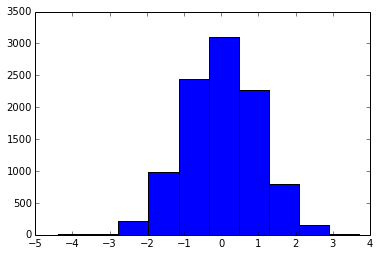

In [91]:
from matplotlib import pyplot as plt

# Plot histogram of 10k normal random variates
plt.hist(np.random.randn(10000))

In [92]:
np.random.uniform(low=0, high=2*np.pi)

2.4532995610657253

You've already seen a few examples of Matplotlib. If you have used MATLAB, then Matplotlib code may look familiar.

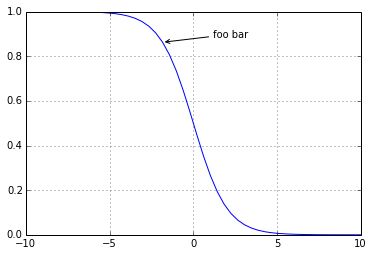

In [93]:
x = np.linspace(-10, 10)
y = 1 / (1 + np.exp(x))
plt.plot(x, y)
plt.annotate(
    'foo bar', (x[20], y[20]), (50, 5),
    textcoords='offset points',
    arrowprops={'arrowstyle': '->'})
plt.grid()

# VII. Astropy

Astropy is a core Python package for astronomy. It is formed from the merger of a number of other Python astronomy packages, but also contains a lot of original code. Core features include:

* `astropy.constants`, `astropy.units`: Physical constants, units, and unit conversion
* `astropy.time`: Manipulation of dates and times
* `astropy.coordinates`: Representation of and conversion between astronomical coordinate systems
* `astropy.table`: Tables and gridded data
* `astropy.io.fits`: Manipulating FITS files
* `astropy.io.ascii`: Manipulating ASCII tables of many different formats
* `astropy.io.votable`: Virtual Observatory tables
* `astropy.wcs`: World Coordinate System transformations
* `astropy.cosmology`: Cosmological calculations
* `astropy.stats`: Astrostatistics
* `astropy.modeling`: multi-D model fitting Swiss army knife

The Astropy project also has sevearl ["affiliated packages"](http://www.astropy.org/affiliated/index.html) that have similar design but are maintained separately, including:

* [APLPy](http://aplpy.github.io): High-level astronomical map making with Matplotlib
* [WCSAxes](http://wcsaxes.readthedocs.org/): Nuts-and-bolts astronomical mapmaking for Matplotlib experts
* [Photutils](http://photutils.readthedocs.org/en/latest/): Aperture photometry
* [Astroquery](http://astroquery.readthedocs.org/en/latest/): Query astronomical databases

Let's experiment by opening up a P48 image. We'll need several modules from the Astropy package for this exercise.

In [94]:
import astropy.coordinates
import astropy.units as u
import astropy.io.fits
import astropy.stats
import astropy.table
import astropy.wcs
import astropy.cosmology
import scipy.optimize
import scipy.odr

I've downloaded a P48 image and put it in the same directory as this noteobook for you.

In [95]:
fits = astropy.io.fits.open('PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits')
fits

Let's grab the first (and only) HDU of this FITS file:

In [96]:
hdu = fits[0]

Then let's take a look at the contents of the header:

In [97]:
hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

Now let's plot the image data. But let's use sigma-clipping to pick a nice scale for the image.

In [98]:
clipped_data = astropy.stats.sigma_clip(hdu.data.flatten())
mid = np.median(clipped_data)
std = np.std(clipped_data - mid)

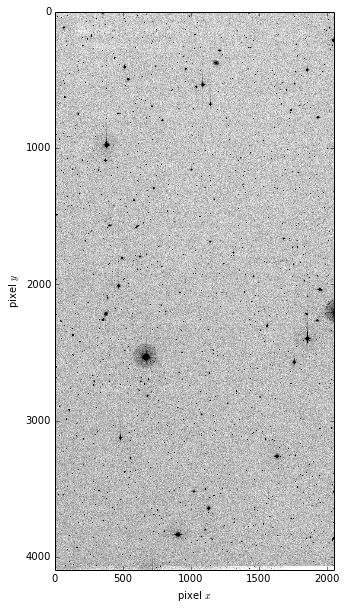

In [99]:
plt.figure(figsize=(20, 10))
plt.imshow(hdu.data, vmin=mid-std, vmax=mid+3*std, cmap='binary')
plt.xlabel('pixel $x$')
plt.ylabel('pixel $y$')

I happen to know that there is something interesting to look at near $\mathrm{RA, Dec}=14^\mathrm{h}29^{m}14.781^{s}, +15^\circ46^\prime26.385^{\prime\prime}$. Let's open the catalog file from IPAC and find this object.

In [100]:
catalog_filename = 'PTF_201307021787_c_p_scie_t041723_u016616794_f02_p003486_c11.ctlg.gz'
catalog_table = astropy.table.Table.read(catalog_filename)
catalog_table

NUMBER,FLAGS,XWIN_IMAGE,YWIN_IMAGE,X_WORLD,Y_WORLD,XPEAK_IMAGE,YPEAK_IMAGE,ERRTHETAWIN_IMAGE,DELTAWIN_J2000,X2WIN_IMAGE,Y2WIN_IMAGE,XYWIN_IMAGE,AWIN_WORLD,BWIN_WORLD,MAG_ISO,MAGERR_ISO,MAG_AUTO,MAGERR_AUTO,MAG_ISOCOR,MAGERR_ISOCOR,MAG_APER [5],MAGERR_APER [5],MAG_PETRO,MAGERR_PETRO,MAG_BEST,MAGERR_BEST,MU_THRESHOLD,MU_MAX,BACKGROUND,THRESHOLD,ALPHAWIN_J2000,THETAWIN_IMAGE,THETAWIN_J2000,ELONGATION,ISOAREA_WORLD,ISOAREAF_WORLD,ISO0,ISO1,ISO2,ISO3,ISO4,ISO5,ISO6,ISO7,FWHM_IMAGE,KRON_RADIUS,PETRO_RADIUS,CLASS_STAR,FLUX_BEST,FLUXERR_BEST,FLUX_AUTO,FLUXERR_AUTO,FLUX_ISO,FLUXERR_ISO,FLUX_APER [5],FLUXERR_APER [5],X_IMAGE,Y_IMAGE,X2_IMAGE,Y2_IMAGE,XY_IMAGE,THETA_IMAGE,ERRAWIN_IMAGE,ERRBWIN_IMAGE,THETAWIN_WORLD,ERRX2WIN_IMAGE,ERRY2WIN_IMAGE,ERRXYWIN_IMAGE,FLUX_RADIUS [5],IMAFLAGS_ISO,NIMAFLAGS_ISO,ERRAWIN_WORLD,ERRBWIN_WORLD,ERRTHETAWIN_WORLD,A_IMAGE,ERRA_IMAGE,B_IMAGE,ERRB_IMAGE,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,ERRTHETA_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,AWIN_IMAGE,BWIN_IMAGE,FLUX_PETRO,FLUXERR_PETRO,ZEROPOINT
,,pix,pix,deg,deg,pix,pix,deg,deg,pix2,pix2,pix2,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,ct,ct,deg,deg,deg,,deg2,deg2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix2,pix,,,,ct,ct,ct,ct,ct,ct,ct,ct,pix,pix,pix2,pix2,pix2,deg,pix,pix,deg,pix2,pix2,pix2,pix,,,deg,deg,deg,pix,pix,pix,pix,deg,deg,deg,deg,deg,pix2,pix2,pix2,pix,pix,ct,ct,
1,28,2043.07354532,214.094174964,217.469880321,16.7680411417,2043,212,87.3618,16.7682109936,5.67699861865,16.965502946,0.065196985681,0.00115701,0.000667602,-17.5135,0.000312259,-17.4988,0.000304322,-17.5144,0.000313243,-13.2036 .. -16.491,0.00332232 .. 0.000526935,-17.5118,0.000321372,-17.4988,0.000304322,-4.04479,-11.9232,1316.3,38.6513,217.469992306,89.6691,0.0596924,4.55761,8.0994e-05,8.7291e-05,1029,717,465,304,237,203,178,167,29.2368,2.5,5.28,0.712394,9.98935e+06,2799.24,9.98935e+06,2799.24,1.01253e+07,2911.33,191173.0 .. 3.94812e+06,584.841 .. 1915.65,2042.69,214.701,5.20661210638,108.150261299,-0.0569632310367,-89.9683,0.00108097,0.000860315,89.9403,7.41048956213e-07,1.16759326735e-06,1.96962849267e-08,3.7187 .. 22.7128,962,947,3.03627e-07,2.41076e-07,-87.7778,10.3995,0.00336429,2.28179,0.00100088,0.00292124,9.45015e-07,0.000639317,2.8049e-07,89.6966,1.002043701e-06,1.13181350792e-05,5.46230766146e-08,4.11897,2.38257,1.01096e+07,2991.67,27.8462
2,4,65.3796000687,121.919426679,216.890730569,16.7970185456,66,122,-89.0142,16.7970191469,1.32502373614,2.14409431293,-0.00972376422076,0.000411542,0.000323209,-15.5504,0.000780183,-15.5137,0.000717886,-15.5526,0.000787251,-13.1979 .. -15.5172,0.00336865 .. 0.000720459,-15.5396,0.000738907,-15.5137,0.000717886,-3.9759,-11.9204,1302.13,42.1467,216.890742798,-89.3199,0.923264,1.37432,2.68406e-05,3.1642e-05,348,234,135,86,56,42,32,25,2.1701,2.5,3.96,0.994925,1.60507e+06,1061.01,1.60507e+06,1061.01,1.66012e+06,1192.63,190185.0 .. 1.61022e+06,589.934 .. 1068.23,65.3379,121.922,2.89854693462,5.4736777658,-0.029297647083,-89.3483,0.000885128,0.000784371,89.0767,6.15287429928e-07,7.83401615848e-07,-2.89353080611e-09,1.47737 .. 4.47661,258,301,2.48763e-07,2.20249e-07,88.7553,2.33966,0.00275483,1.70241,0.00205785,0.000657558,7.74227e-07,0.000478028,5.7785e-07,89.6884,4.23484759239e-06,7.58898725937e-06,1.82404605635e-08,1.46431,1.15105,1.64384e+06,1118.46,27.8244
3,0,983.16644559,38.5584028713,217.159944453,16.8193113926,983,39,55.2863,16.8192926102,1.11399415148,1.130672151,0.040566587761,0.000302894,0.000291846,-11.0397,0.0145841,-10.977,0.0140901,-11.1272,0.0166746,-9.30163 .. -10.9005,0.019648 .. 0.0132189,-11.3312,0.025697,-10.977,0.0140901,-4.04479,-8.21821,1296.62,41.9948,217.159906852,50.808,-37.7165,1.17861,8.89439e-06,1.05473e-05,113,83,49,29,20,14,7,4,2.73618,2.70442,7.26,0.0295786,24591.9,319.064,24591.9,319.064,26055.4,349.903,5255.96 .. 22919.0,95.0915 .. 278.972,983.294,38.4909,4.40033478197,5.33121119071,0.641424204634,62.9829,0.00980184,0.00973746,-52.2835,9.52260901701e-05,9.56681194092e-05,5.888

Now, let's create a coordinates object to represent the target that we are searching for:

In [101]:
target_coord = astropy.coordinates.SkyCoord(
    '14h29m14.781s +15d46m26.385s')
target_coord

<SkyCoord (ICRS): ra=217.3115875 deg, dec=15.7739958333 deg>

Now, let's match this position against the source catalog:

In [102]:
# Coordinates of objects in catalog
catalog_coords = astropy.coordinates.SkyCoord(
    ra=catalog_table['ALPHAWIN_J2000'],
    dec=catalog_table['DELTAWIN_J2000'])

# Do source matching
index, separation, distance = target_coord.match_to_catalog_sky(catalog_coords)
index, separation

(array(3259), <Angle [  4.20500043e-06] deg>)

Here is the closest-matching row:

In [103]:
index = np.asscalar(index)
matching_row = catalog_table[index]

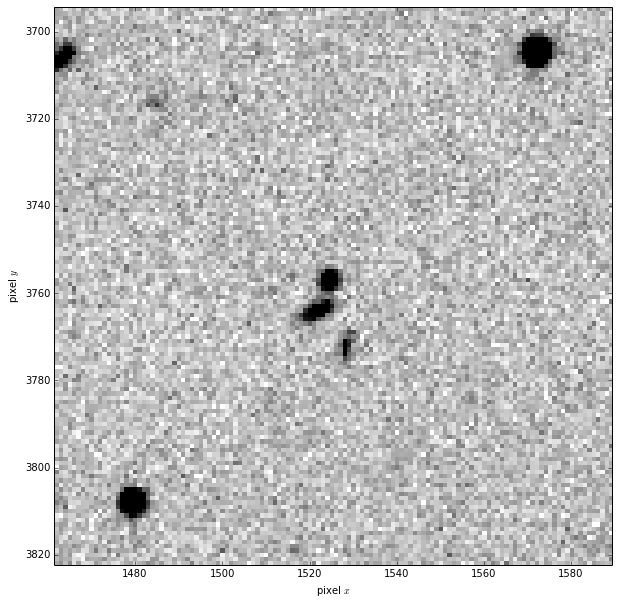

In [104]:
plt.figure(figsize=(10, 10))
plt.imshow(hdu.data, vmin=mid-std, vmax=mid+3*std, cmap='binary', interpolation='nearest')
plt.xlim(matching_row['XWIN_IMAGE'] - 64, matching_row['XWIN_IMAGE'] + 64)
plt.ylim(matching_row['YWIN_IMAGE'] - 64, matching_row['YWIN_IMAGE'] + 64)

# I happen to know that these images are upside down; use APLPy or the like to
# automatically orient North upward
plt.gca().invert_yaxis()

plt.xlabel('pixel $x$')
plt.ylabel('pixel $y$')

Let's calibrate the Sextractor photometry. We'll query the [PTF photometric calibrator catalog](http://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?projshort=Contributed_Data_Sets) at [IRSA](http://irsa.ipac.caltech.edu/) using [Astroquery](http://astroquery.readthedocs.org/)...

In [105]:
from astroquery.irsa import Irsa

calib_table = Irsa.query_region(
    target_coord,
    catalog='ptfphotcalcat',
    radius=200*u.arcsec)
calib_table

ra,dec,clon,clat,np,nt,bstrms,rptf,rerr,rmerr,rperr,mutype,errmu,ptffield,ci,flag,dist,angle,id
deg,deg,,,,,,mag,mag,mag,mag,,,,,,arcs,deg,
217.342,15.781,14h29m22.06s,15d46m52.22s,9,5,0.02,18.722000000000001,0.031,0.024,0.039,-0.029000000000000001,0.107,3486,11,1,108.254667,76.195634999999996,0
217.316,15.753,14h29m15.86s,15d45m09.99s,9,5,0.02,16.187999999999999,0.01,0.0060000000000000001,0.014999999999999999,0.037999999999999999,0.085000000000000006,3486,11,1,77.979508999999993,168.48448200000001,1
217.326,15.789,14h29m18.12s,15d47m19.13s,9,5,0.02,15.209,0.0070000000000000001,0.0070000000000000001,0.0070000000000000001,-0.0030000000000000001,0.058999999999999997,3486,11,1,71.441114999999996,42.430059999999997,2
217.275,15.745,14h29m05.90s,15d44m42.06s,9,5,0.02,18.210000000000001,0.027,0.025000000000000001,0.029999999999999999,0.063,0.128,3486,11,1,165.32226600000001,230.87034399999999,3
217.294,15.788,14h29m10.52s,15d47m18.12s,9,5,0.02,18.102,0.043999999999999997,0.050000000000000003,0.037999999999999999,-1.159,0.089999999999999997,3486,11,1,80.340373999999997,310.07637399999999,4
217.268,15.768,14h29m04.35s,15d46m05.74s,9,5,0.02,18.297999999999998,0.027,0.039,0.014999999999999999,-0.27100000000000002,0.10199999999999999,3486,11,1,152.00161900000001,262.19258600000001,5
217.280,15.769,14h29m07.21s,15d46m06.83s,8,5,0.02,18.581,0.028000000000000001,0.012999999999999999,0.042999999999999997,0.017999999999999999,0.088999999999999996,3486,11,1,111.05929,259.85529100000002,6
217.271,15.768,14h29m04.98s,15d46m03.62s,9,5,0.02,17.762,0.029000000000000001,0.023,0.035999999999999997,-0.55300000000000005,0.092999999999999999,3486,11,1,143.25297699999999,260.85669999999999,7
217.344,15.749,14h29m22.58s,15d44m57.72s,9,5,0.02,18.271999999999998,0.029999999999999999,0.025999999999999999,0.033000000000000002,-0.63200000000000001,0.10299999999999999,3486,11,1,143.30828099999999,128.22578999999999,8


Let's look at where these are in relation to are target. We'll need to convert the RA, Dec in the table to pixel coordinates. That's where the World Coordinate System (WCS) transformation comes in.

In [106]:
wcs = astropy.wcs.WCS(hdu.header)

RADECSYS is non-standard, use RADESYSa. [astropy.wcs.wcs]
RADECSYS is non-standard, use RADESYSa.


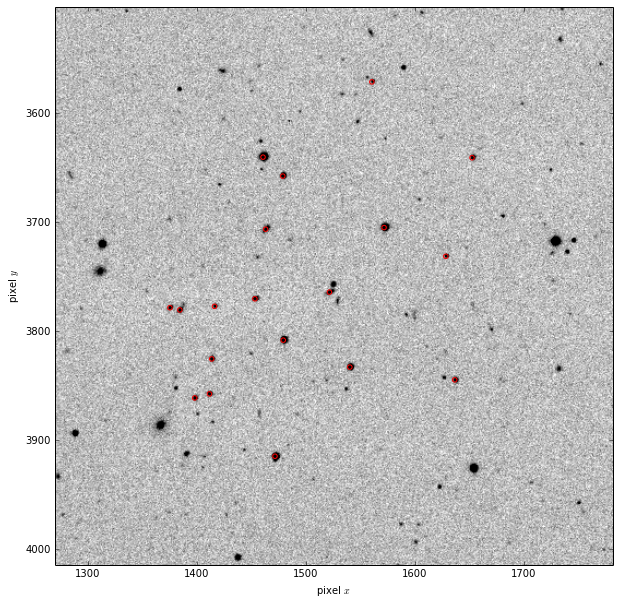

In [107]:
plt.figure(figsize=(10, 10))
plt.imshow(hdu.data, vmin=mid-std, vmax=mid+3*std, cmap='binary')
plt.xlim(matching_row['XWIN_IMAGE'] - 256, matching_row['XWIN_IMAGE'] + 256)
plt.ylim(matching_row['YWIN_IMAGE'] - 256, matching_row['YWIN_IMAGE'] + 256)

# Note: last argument is 'origin': FITS standard uses 1-based Fortran-like
# indexing, but Python uses 0-based C-like indexing. In this case, we are
# aligning these locations to a Python array, so we want 0-based indexing.

x, y = wcs.all_world2pix(calib_table['ra'], calib_table['dec'], 0)
plt.scatter(x, y, facecolor='none', edgecolor='red')

# I happen to know that these images are upside down; use APLPy or the like to
# automatically orient North upward
plt.gca().invert_yaxis()

plt.xlabel('pixel $x$')
plt.ylabel('pixel $y$')

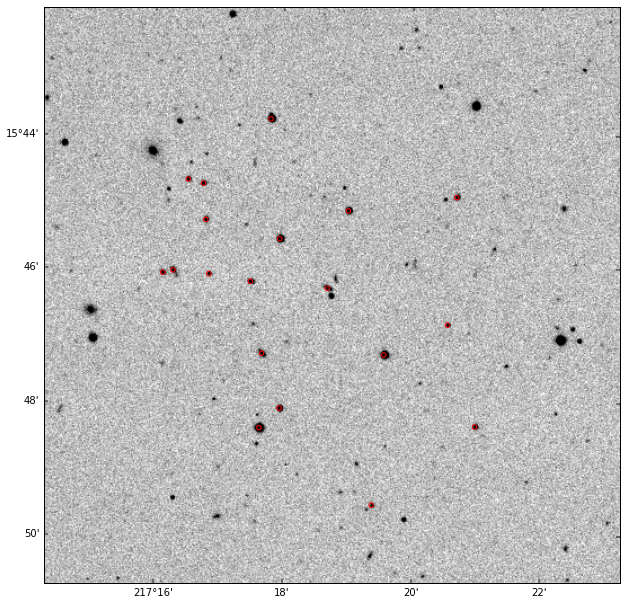

In [108]:
from wcsaxes import WCSAxes
fig = plt.figure(figsize=(10, 10))
ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=wcs)
fig.add_axes(ax)
plt.xlim(matching_row['XWIN_IMAGE'] - 256, matching_row['XWIN_IMAGE'] + 256)
plt.ylim(matching_row['YWIN_IMAGE'] - 256, matching_row['YWIN_IMAGE'] + 256)
ax.imshow(
    hdu.data, vmin=mid-std, vmax=mid+3*std,
    cmap='binary')
x, y = wcs.all_world2pix(calib_table['ra'], calib_table['dec'], 0)
plt.scatter(x, y, facecolor='none', edgecolor='red')

Let's now match the calibration sources with sources in the SExtractor catalog.

In [109]:
calib_coords = astropy.coordinates.SkyCoord(calib_table['ra'], calib_table['dec'])
indexes, _, _ = calib_coords.match_to_catalog_sky(catalog_coords)

In [110]:
matches = astropy.table.Table()
matches.add_column(calib_table['rptf'])
matches.add_column(calib_table['rerr'])
matches.add_column(catalog_table[indexes]['MAG_AUTO'])
matches.add_column(catalog_table[indexes]['MAGERR_AUTO'])
matches

rptf,rerr,MAG_AUTO,MAGERR_AUTO
mag,mag,mag,mag
18.722000000000001,0.031,-9.11966,0.0361363
16.187999999999999,0.01,-11.6361,0.00571092
15.209,0.0070000000000000001,-12.6132,0.00320143
18.210000000000001,0.027,-9.65321,0.0249158
18.102,0.043999999999999997,-9.81076,0.0356542
18.297999999999998,0.027,-9.46386,0.0304643
18.581,0.028000000000000001,-9.19389,0.0344066
17.762,0.029000000000000001,-9.97645,0.025521
18.271999999999998,0.029999999999999999,-9.57258,0.0308042


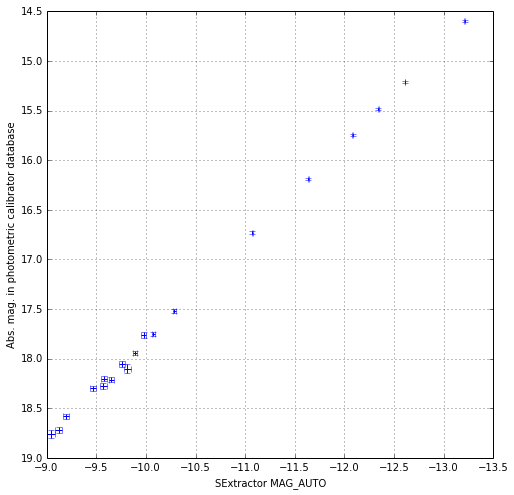

In [111]:
plt.figure(figsize=(8, 8))
plt.errorbar(matches['MAG_AUTO'], matches['rptf'],
    xerr=matches['MAGERR_AUTO'], yerr=matches['rerr'],
    linestyle='none')
plt.xlabel('SExtractor MAG_AUTO')
plt.ylabel('Abs. mag. in photometric calibrator database')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()

Now let's do a linear fit. Scipy's orthogonal data regression module, `scipy.odr`, is great for fitting functions with errors in both independent and dependent variables.

In [112]:
data = scipy.odr.RealData(
    x=matches['MAG_AUTO'], sx=matches['MAGERR_AUTO'],
    y=matches['rptf'], sy=matches['rerr'])
odr = scipy.odr.ODR(data, scipy.odr.models.unilinear)
odr.run()

odr.output.pprint()

Beta: [  0.99876513  27.80407078]
Beta Std Error: [ 0.00359417  0.043562  ]
Beta Covariance: [[  1.26586090e-05   1.52798133e-04]
 [  1.52798133e-04   1.85953303e-03]]
Residual Variance: 1.02049678294
Inverse Condition #: 0.00692978201087
Reason(s) for Halting:
  Sum of squares convergence


Let's see what the fit looks like:

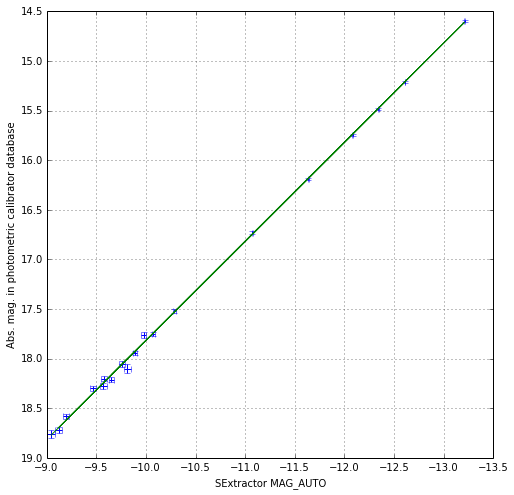

In [113]:
plt.figure(figsize=(8, 8))
plt.errorbar(matches['MAG_AUTO'], matches['rptf'],
    xerr=matches['MAGERR_AUTO'], yerr=matches['rerr'],
    linestyle='none')
plt.plot(matches['MAG_AUTO'], odr.model.fcn(odr.output.beta, matches['MAG_AUTO']))
plt.xlabel('SExtractor MAG_AUTO')
plt.ylabel('Abs. mag. in photometric calibrator database')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()

Finally, we can evaluate the magnitude of the target:

In [114]:
mag_R = odr.model.fcn(odr.output.beta, matching_row['MAG_AUTO'])
mag_R

17.338610986250472

Then, we propagate errors from the fit and from SExtractor's relative magnitude measurement.

In [115]:
# Jacobian w.r.t. fit parameters
fjacb = odr.model.fjacb(odr.output.beta, np.atleast_1d(matching_row['MAG_AUTO']))
# Jacobian w.r.t. data
fjacd = odr.model.fjacd(odr.output.beta, matching_row['MAG_AUTO'])

# Uncertainty in magnitude due to fit
var = np.dot(fjacb.T, np.dot(odr.output.cov_beta, fjacb))

# Add contribution due to uncertainty in relative photometry
var += np.dot(fjacd.T, np.dot(matching_row['MAGERR_AUTO']**2, fjacd))

# Take square root -> error bar
emag_R = np.asscalar(np.sqrt(var))
emag_R

0.01476686832529662

So, but for color corrections, this source has a magnitude of $17.34 \pm 0.015$.

This is the afterglow of a GRB at a redshift of $z=0.145$. What's its luminosity distance?

In [116]:
z = 0.145
cosmo = astropy.cosmology.get_current()
DL = cosmo.luminosity_distance(z)
DL

        Use astropy.cosmology.default_cosmology.get instead. [astropy.utils.misc]
        Use astropy.cosmology.default_cosmology.get instead.


<Quantity 694.9859108588807 Mpc>

Let's convert this to a distance modulus to find the source's absolute magnitude.

In [117]:
distance_modulus = 5 * np.log10(DL / (10*u.pc))
distance_modulus

<Quantity 39.209880002099744>

Another shortcut:

In [118]:
cosmo.distmod(z)

<Quantity 39.209880002099744 mag>

And so the absolute magnitude is:

In [119]:
mag_R - distance_modulus

<Quantity -21.871269015849272>